In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import resnet_V2
from tensorflow import keras

In [2]:
ae = resnet_V2.ResNetAE()

plot_model(ae.build_graph(), to_file='model_graph/ResNetAE.png', show_shapes=True)

In [3]:
en = resnet_V2.ResNetEncoder()
de = resnet_V2.ResNetDecoder()

In [4]:
plot_model(en.build_graph(), to_file='model_graph/ResNetEncoder.png')

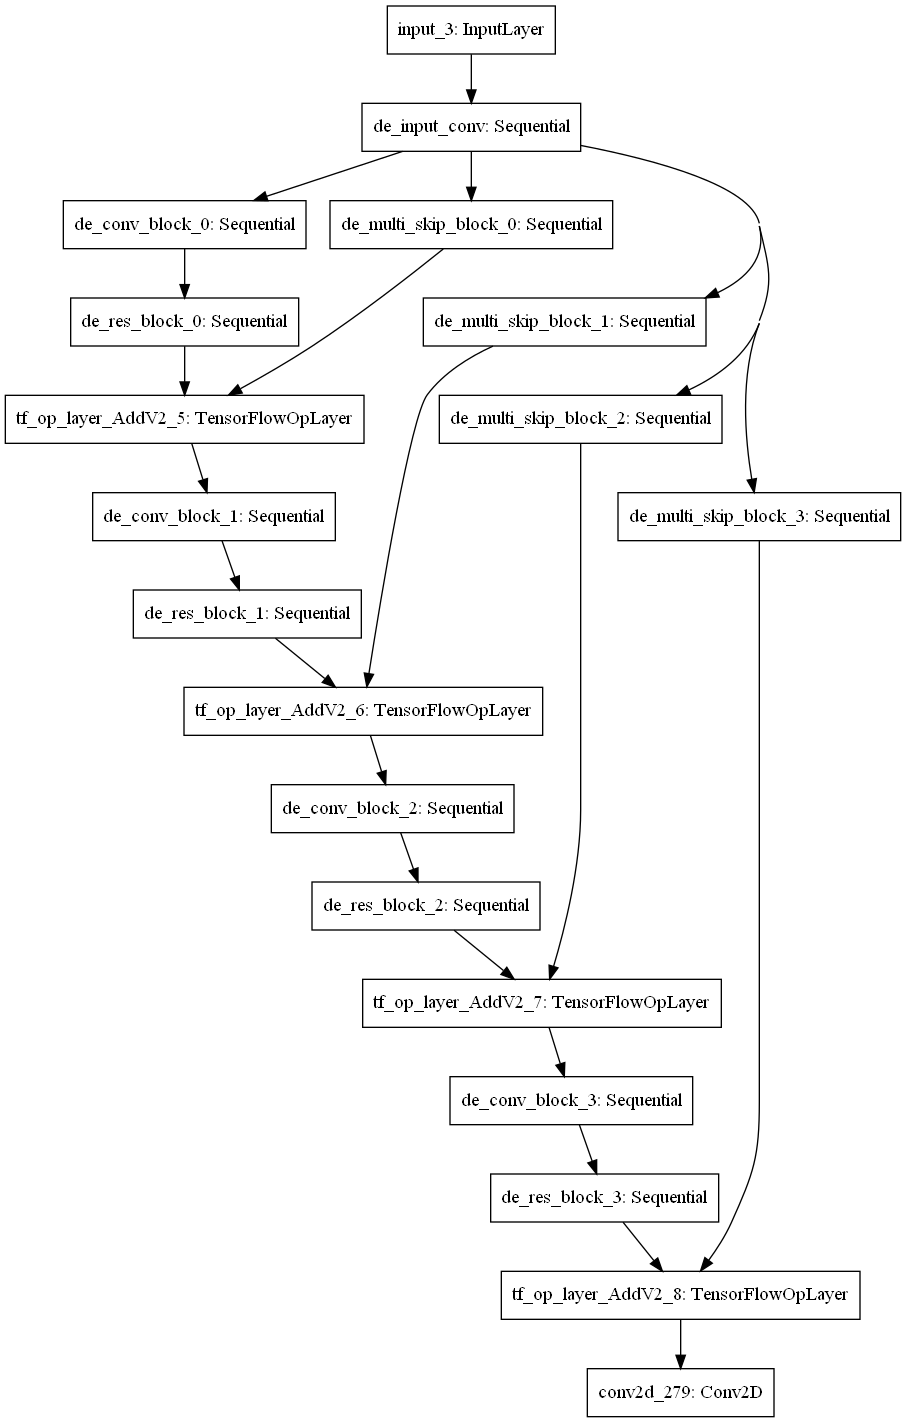

In [5]:
plot_model(de.build_graph(), to_file='model_graph/ResNetDecoder.png')

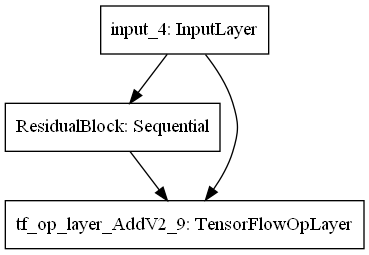

In [6]:
res_block = resnet_V2.ResiduaBlock(3, out_channels=3)
plot_model(res_block.build_graph(), to_file='model_graph/ResBlock1.png')

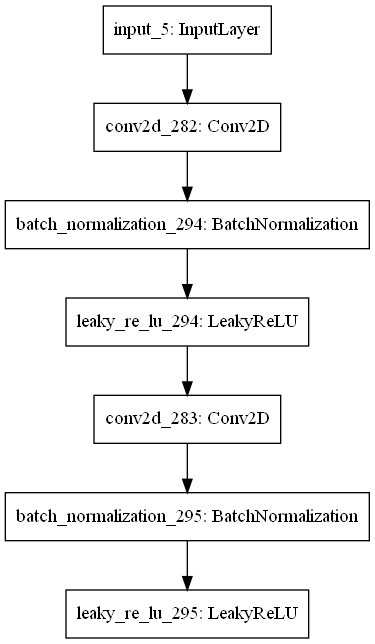

In [7]:
residual_block = keras.Sequential([
            keras.layers.InputLayer((256, 256, 3)),
            keras.layers.Conv2D(3, 3, 1, padding='same'),
            keras.layers.BatchNormalization(),
            keras.layers.LeakyReLU(),
            keras.layers.Conv2D(3, 3, 1, padding='same'),
            keras.layers.BatchNormalization(),
            keras.layers.LeakyReLU()
        ])

plot_model(residual_block, to_file='model_graph/ResBlock2.png')

In [10]:
temp = tf.random.normal(shape=(1, 256, 256, 3))
en(temp)

<tf.Tensor: shape=(1, 16, 16, 10), dtype=float32, numpy=
array([[[[  4.165386  ,   0.49753666,  -7.226475  , ...,  12.638113  ,
           47.713474  , -18.390533  ],
         [ -6.8651724 , -12.687027  ,  20.134132  , ...,  59.01874   ,
           81.09682   ,  -3.162694  ],
         [ -2.3891335 ,   3.4212503 ,  23.032742  , ...,  52.128513  ,
           97.73863   ,  -7.845084  ],
         ...,
         [ -1.5815392 ,  -3.2190266 ,  26.5688    , ...,  64.24921   ,
          103.99448   ,  -7.0606604 ],
         [-15.806654  ,  -6.724698  ,  28.264423  , ...,  55.715706  ,
           84.971405  ,  14.601337  ],
         [ -2.4854627 ,  -5.0021133 ,  21.687668  , ...,  63.07247   ,
           61.299835  ,   0.7179508 ]],

        [[ 12.450796  , -34.93294   , -27.59125   , ...,   2.2483802 ,
           39.26984   , -40.821404  ],
         [ -1.7527275 , -53.673912  , -18.782663  , ...,  26.486885  ,
          106.98198   , -45.459015  ],
         [ 18.098648  , -33.230164  , -41.63383

In [11]:
en.summary()

Model: "res_net_encoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_block_0 (Sequential)    (None, 128, 128, 16)      592       
_________________________________________________________________
conv_block_1 (Sequential)    (None, 64, 64, 32)        2208      
_________________________________________________________________
conv_block_2 (Sequential)    (None, 32, 32, 64)        8512      
_________________________________________________________________
conv_block_3 (Sequential)    (None, 16, 16, 128)       33408     
_________________________________________________________________
res_block_0 (Sequential)     (None, 256, 256, 8)       9856      
_________________________________________________________________
res_block_1 (Sequential)     (None, 128, 128, 16)      38144     
_________________________________________________________________
res_block_2 (Sequential)     (None, 64, 64, 32)  

In [16]:
temp = tf.random.normal(shape=(1, 16, 16, 256))
de(temp)

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[  1.0550141 ,   0.89135283,   1.6068184 ],
         [  1.4929005 ,  -1.3497002 ,   1.1201922 ],
         [  3.786604  ,   1.2789525 ,   0.53508496],
         ...,
         [ -1.4564563 ,  -0.61971956,   6.2540226 ],
         [  2.3694277 ,   0.16669497,   5.1974807 ],
         [  1.1154029 ,  -0.94101644,   4.370047  ]],

        [[ -0.5424216 ,   5.4250364 ,   0.9466624 ],
         [ -1.9113069 ,   6.0206976 ,   6.2885265 ],
         [ -0.87866974,   0.9194219 ,   3.5908563 ],
         ...,
         [  3.6760173 ,   2.2539206 ,  10.071707  ],
         [  3.1736298 ,  -2.9671674 ,   6.6973705 ],
         [  0.51318043,  -1.2302816 ,   8.200487  ]],

        [[ -0.85337806,   3.202333  ,  -5.4791594 ],
         [  1.1001182 ,   2.493273  ,  -5.4389014 ],
         [  3.9773552 ,   5.2237372 , -10.050518  ],
         ...,
         [ -1.0927148 ,   2.0274599 ,   0.7175273 ],
         [  1.4212754 ,  -0.7600217 ,   1.373705

In [17]:
de.summary()

Model: "res_net_decoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
de_conv_block_0 (Sequential) (None, 32, 32, 64)        33088     
_________________________________________________________________
de_conv_block_1 (Sequential) (None, 64, 64, 32)        8352      
_________________________________________________________________
de_conv_block_2 (Sequential) (None, 128, 128, 16)      2128      
_________________________________________________________________
de_conv_block_3 (Sequential) (None, 256, 256, 8)       552       
_________________________________________________________________
de_res_block_0 (Sequential)  (None, 32, 32, 64)        594944    
_________________________________________________________________
de_res_block_1 (Sequential)  (None, 64, 64, 32)        150016    
_________________________________________________________________
de_res_block_2 (Sequential)  (None, 128, 128, 16)

In [19]:
temp = tf.random.normal(shape=(1, 256, 256, 3))
ae(temp)
ae.summary()

Model: "res_net_ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
res_net_encoder (ResNetEncod (None, 16, 16, 128)       1479600   
_________________________________________________________________
res_net_decoder (ResNetDecod (None, 256, 256, 3)       1477515   
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 32768)             4227072   
Total params: 11,378,619
Trainable params: 11,368,683
Non-trainable params: 9,936
_________________________________________________________________


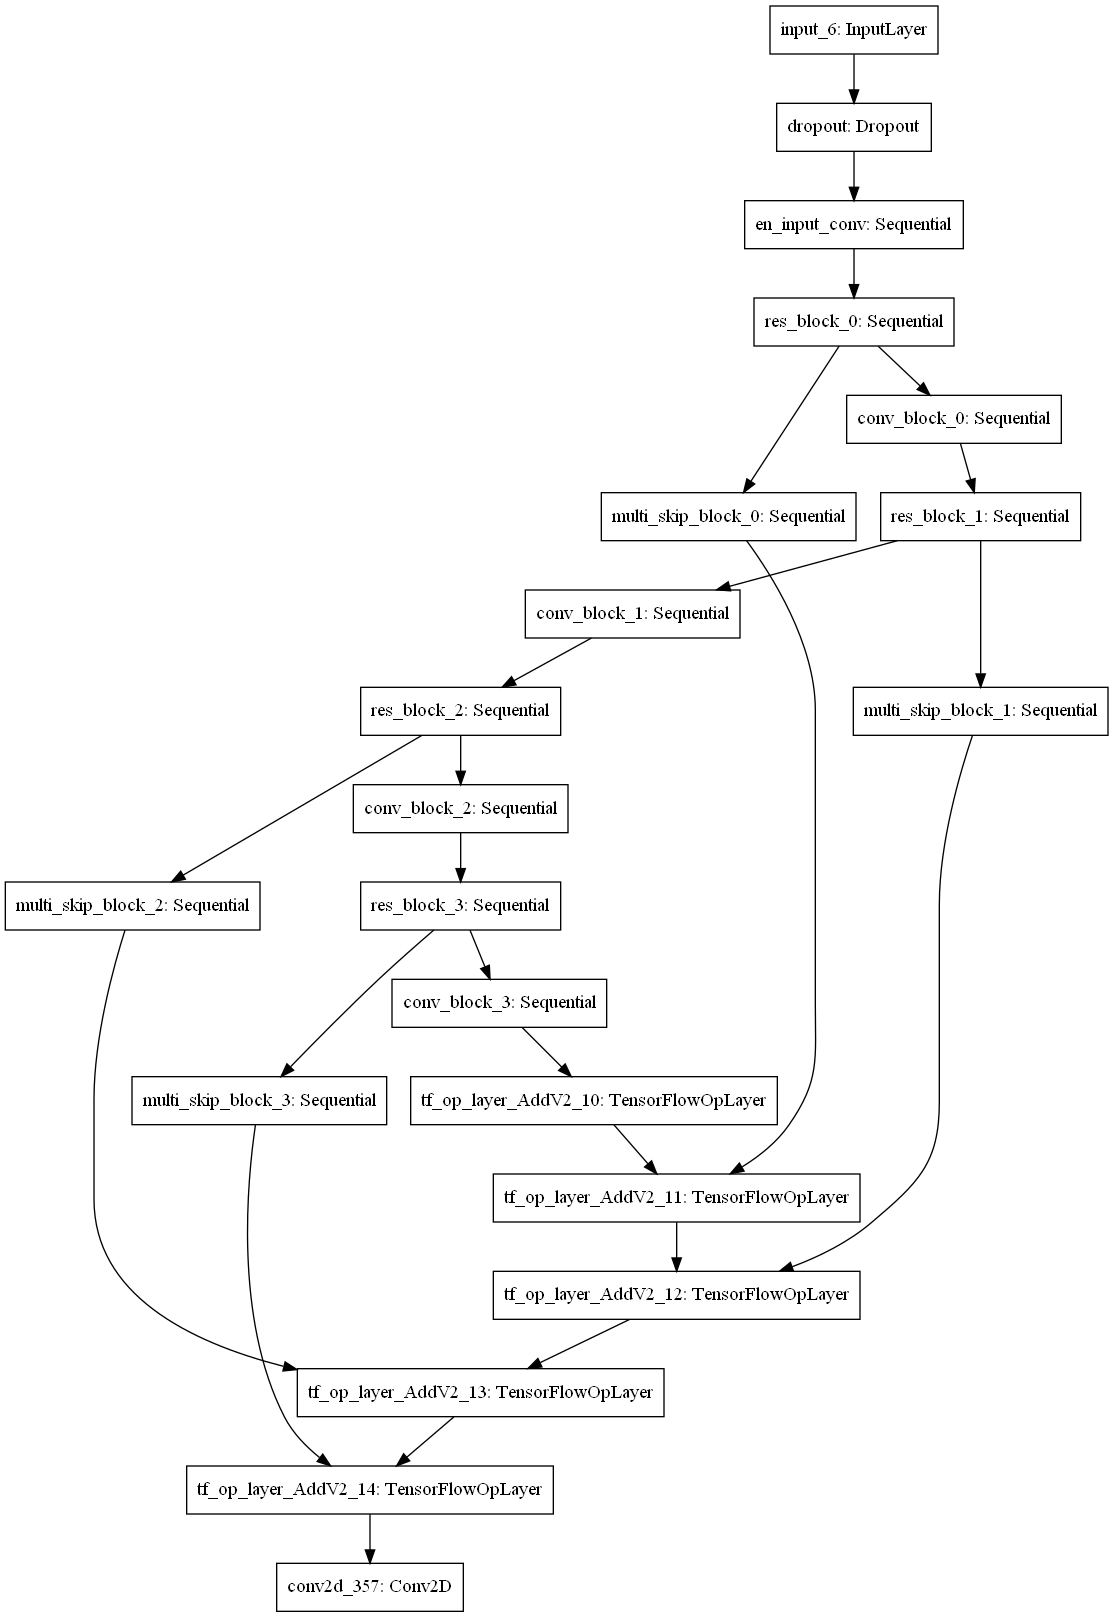

In [ ]:
en = resnet_V2.ResNetEncoder(drop_out=0.5)
plot_model(en.build_graph(), to_file='model_graph/ResNetEncoder_dropout.png')